In [1]:
import time
import datetime as dt

def epoch_to_millis(epoch):
    
    datetime_time = dt.datetime.fromtimestamp(epoch)
    s = (datetime_time - dt.datetime(1970, 1, 1)).total_seconds()-3600
               
    return s
    

In [2]:
#import e parsing file di log
import pandas as pd



def start(path):
    
    file = open(path, 'r')
    Lines = file.readlines()
    
    return Lines

def rmse_distance(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'COUPLE(N_ITER,DISTANCE RMSE)' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = float(s[1])
            coppie.append((a,b))          
        
    return coppie


def execution_time_gurobi(Lines):
    
    for line in Lines:
        
        if 'TEMPO_ESECUZIONE GUROBI' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))
    
    
def execution_time_tensorflow(Lines):
    
    for line in Lines:
        if 'TEMPO_ESECUZIONE TENSORFLOW' in line:
            split = line.split(':')
            
    return epoch_to_millis(float(split[3]))


def time_per_iter(Lines):
    
    coppie = []

    for line in Lines:
        
        if 'TEMPO PER ITERAZIONI (N_ITER,TEMPO) TENSORFLOW' in line:
            split = line.split(':')
            s = split[3].replace('[','')
            s = s.replace('(','')
            s = s.replace(')','')
            s = s.replace(']','')
            s = s.split(',')
            a = int(s[0])
            b = epoch_to_millis(float(s[1]))
            coppie.append((a,b))          
        
    return coppie


In [3]:
#funzione per graficare

import matplotlib.pyplot as plt

def graph_rmse_distance(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    ax.set_title('Rmse Distance per number of iterations')
    
    ax.set_ylabel('RMSE Distance (Gurobi -TensorFlow)')
    ax.set_xlabel('Number of Iterations')

    return plt.show()

def graph_time_per_iter(coppie):

    x_val = [x[0] for x in coppie]
    y_val = [x[1] for x in coppie]

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(x_val,y_val)
    ax.plot(x_val,y_val,'or')
    
    
    ax.set_title('Time Tensorflow per Number of Iterations')
    ax.set_ylabel('Total Time Tensorflow)')
    ax.set_xlabel('Number of Iteration')

    return plt.show()

def graph_rmse_distance_and_execution_time(couples_rmse, couples_time):
    
    x1 = [x[0] for x in couples_rmse]
    x2 = [x[0] for x in couples_time]

    y1 = [x[1] for x in couples_rmse]
    y2 = [x[1] for x in couples_time]
    
    plt.subplot(2, 1, 1)
    plt.plot(x1, y1, 'ko-')
    plt.title('Rmse Distance per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('RMSE Distance (Gurobi -TensorFlow)')


    plt.subplot(2, 1, 2)
    plt.plot(x2, y2, 'r.-')
    plt.title('Time Tensorflow per Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Total Time Tensorflow)')
    return plt.show()


In [4]:
#funzione per tabella

def tab_rmse_distance(coppie):
    
    print ("N_ITER        RMSE_DISTANCE")
    for i in coppie:
        print ("{:<14}{:<11}".format(*i))

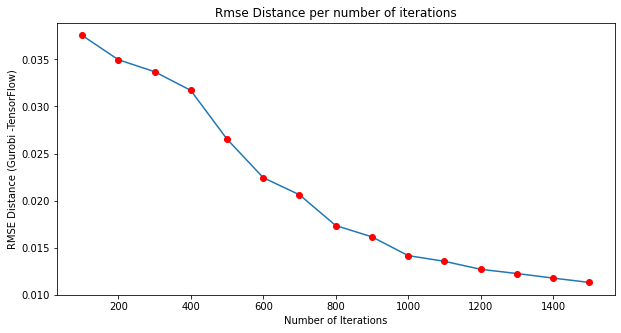

N_ITER        RMSE_DISTANCE
100           0.03754504543547167
200           0.03495978618178524
300           0.033689431105267446
400           0.03170129764718153
500           0.026529525287995463
600           0.022435474923040426
700           0.020616604142190867
800           0.01735411789158385
900           0.016152887853952747
1000          0.014160284557220909
1100          0.013555246229100188
1200          0.012705767277004966
1300          0.01225781705353021
1400          0.011772896504988743
1500          0.011310259737006454


In [5]:
path = "../../../log/Prove-5/Versicolor/c1_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


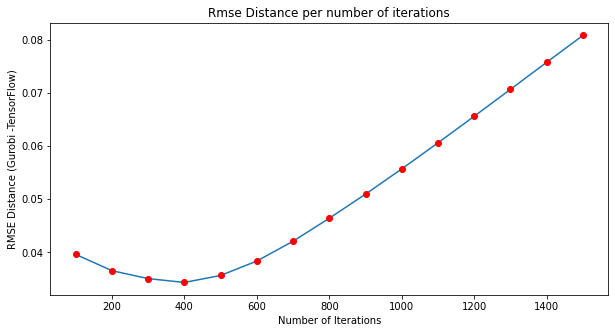

N_ITER        RMSE_DISTANCE
100           0.039609117244332546
200           0.03654721462623039
300           0.03504991403263493
400           0.03433001075700904
500           0.03564381715395501
600           0.038363104928787334
700           0.042088390006576354
800           0.046420972490339434
900           0.050953836888217086
1000          0.055704991015190775
1100          0.06060945795798603
1200          0.06561227332697642
1300          0.0706773357979931
1400          0.07577154357489538
1500          0.080834167169655


In [6]:
path = "../../../log/Prove-5/Versicolor/c1_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

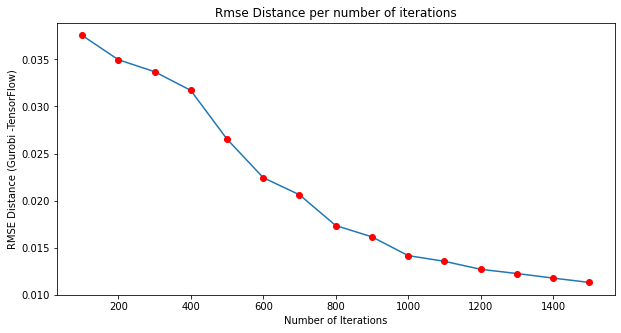

N_ITER        RMSE_DISTANCE
100           0.03754504543547167
200           0.03495978618178524
300           0.033689431105267446
400           0.03170129764718153
500           0.026529525287995463
600           0.022435474923040426
700           0.020616604142190867
800           0.01735411789158385
900           0.016152887853952747
1000          0.014160284557220909
1100          0.013555246229100188
1200          0.012705767277004966
1300          0.01225781705353021
1400          0.011772896504988743
1500          0.011310259737006454


In [7]:
path = "../../../log/Prove-5/Versicolor/c1_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

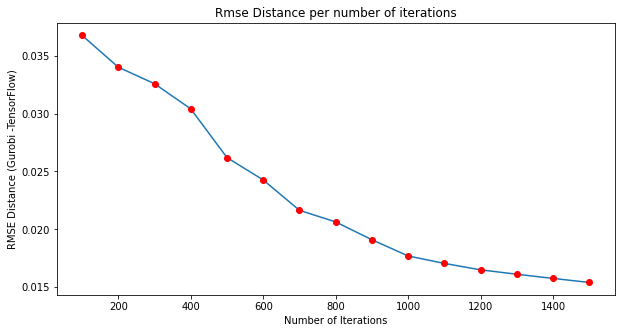

N_ITER        RMSE_DISTANCE
100           0.03675728479994636
200           0.034006943686826975
300           0.03257832886291722
400           0.03040620498055097
500           0.02619587663234703
600           0.024263533820174692
700           0.021641662179516977
800           0.0206378729462049
900           0.019100053409391957
1000          0.017697315642960187
1100          0.017055095053329986
1200          0.016498369066954635
1300          0.01611856921194686
1400          0.015757613711003347
1500          0.015410287482896846


In [8]:
path = "../../../log/Prove-5/Versicolor/c1_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


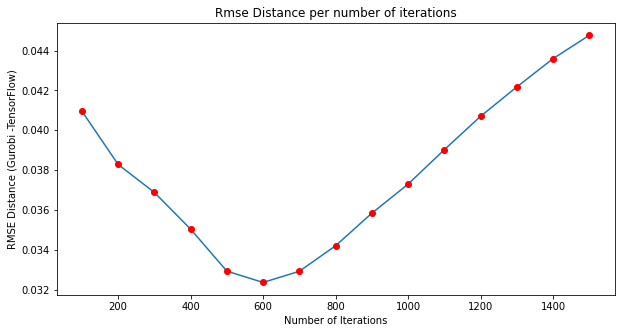

N_ITER        RMSE_DISTANCE
100           0.04095402793234632
200           0.03828160615727071
300           0.03687861186124101
400           0.03503560129208749
500           0.03293123045176333
600           0.032363795721503864
700           0.032924325858656456
800           0.034203729078989074
900           0.035836138924210316
1000          0.03729435167226879
1100          0.03902070021686185
1200          0.04069585823221902
1300          0.04216961758448184
1400          0.04358828168642922
1500          0.0447600529457135


In [9]:
path = "../../../log/Prove-5/Versicolor/c1_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

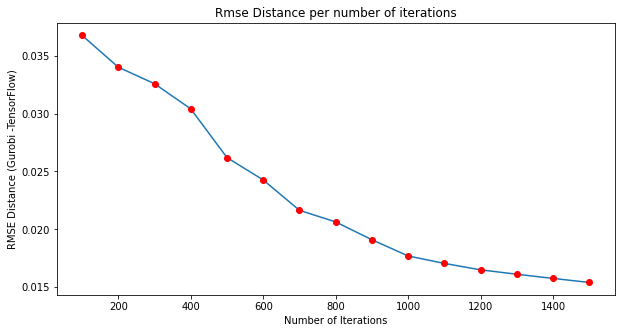

N_ITER        RMSE_DISTANCE
100           0.03675728479994636
200           0.034006943686826975
300           0.03257832886291722
400           0.03040620498055097
500           0.02619587663234703
600           0.024263533820174692
700           0.021641662179516977
800           0.0206378729462049
900           0.019100053409391957
1000          0.017697315642960187
1100          0.017055095053329986
1200          0.016498369066954635
1300          0.01611856921194686
1400          0.015757613711003347
1500          0.015410287482896846


In [10]:
path = "../../../log/Prove-5/Versicolor/c1_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

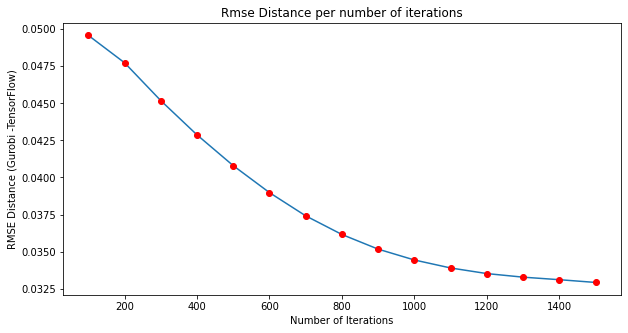

N_ITER        RMSE_DISTANCE
100           0.04958292870062479
200           0.04773523732978315
300           0.04518285956861268
400           0.04287128074757229
500           0.040796097016481785
600           0.038977458793752584
700           0.03741063474010229
800           0.036153129497835855
900           0.03516470126164321
1000          0.03443373924160369
1100          0.033895475593573705
1200          0.03351738773788059
1300          0.03327592282446924
1400          0.033105013628405046
1500          0.03291981133034167


In [11]:
path = "../../../log/Prove-5/Versicolor/c1_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


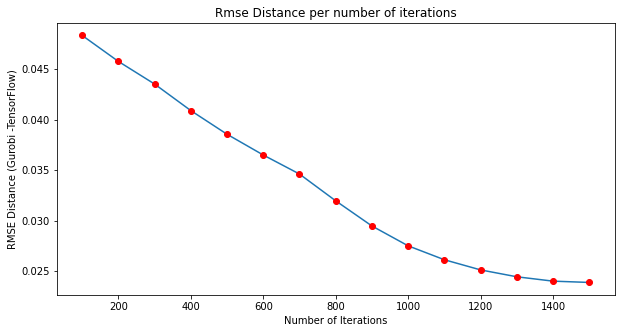

N_ITER        RMSE_DISTANCE
100           0.048364433816454104
200           0.0457856829784005
300           0.043539154459066
400           0.0409071499731222
500           0.03855838405430741
600           0.036499972554538886
700           0.03461165416714521
800           0.03195475983848026
900           0.029459032974610742
1000          0.02748840142782849
1100          0.02610916616376702
1200          0.025101464244288305
1300          0.024419696116815354
1400          0.023987238419441732
1500          0.023859020343237117


In [12]:
path = "../../../log/Prove-5/Versicolor/c1_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

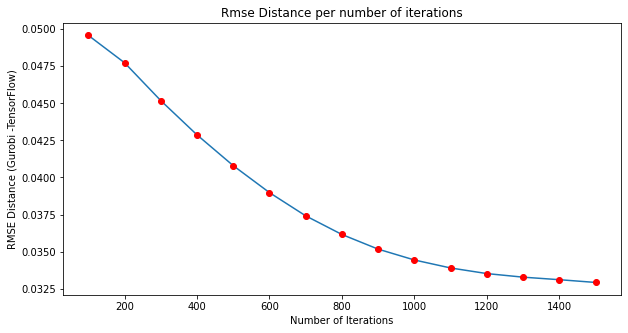

N_ITER        RMSE_DISTANCE
100           0.04958292870062479
200           0.04773523732978315
300           0.04518285956861268
400           0.04287128074757229
500           0.040796097016481785
600           0.038977458793752584
700           0.03741063474010229
800           0.036153129497835855
900           0.03516470126164321
1000          0.03443373924160369
1100          0.033895475593573705
1200          0.03351738773788059
1300          0.03327592282446924
1400          0.033105013628405046
1500          0.03291981133034167


In [13]:
path = "../../../log/Prove-5/Versicolor/c1_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

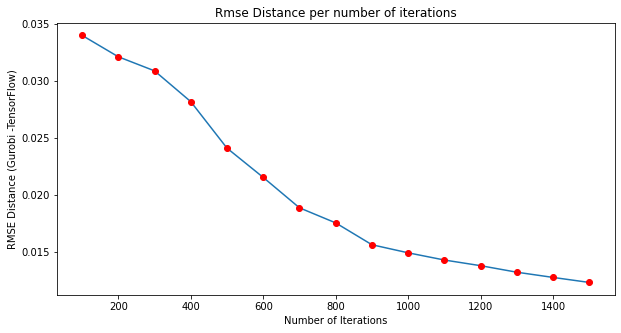

N_ITER        RMSE_DISTANCE
100           0.0339932695761943
200           0.03211723316684075
300           0.030883665470528277
400           0.028186123064350505
500           0.024111864373523712
600           0.021547509907873647
700           0.018883251915568892
800           0.01756201513980493
900           0.015648045801110233
1000          0.014940215363876984
1100          0.014309147603853834
1200          0.013812562470831758
1300          0.013241045021356746
1400          0.012784293186032176
1500          0.012344727906985818


In [14]:
path = "../../../log/Prove-5/Versicolor/c75_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


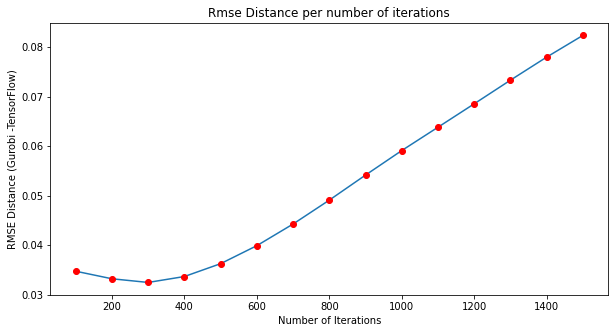

N_ITER        RMSE_DISTANCE
100           0.03475941666579385
200           0.03323302781316884
300           0.03249117356506966
400           0.03368725166191951
500           0.036284179067165
600           0.03991876828171679
700           0.04428846491597332
800           0.049117417225828394
900           0.05417548145140543
1000          0.059126069677323485
1100          0.06383971239698692
1200          0.06857069395331705
1300          0.07334237784147658
1400          0.07800082735185139
1500          0.08238497842062587


In [15]:
path = "../../../log/Prove-5/Versicolor/c75_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

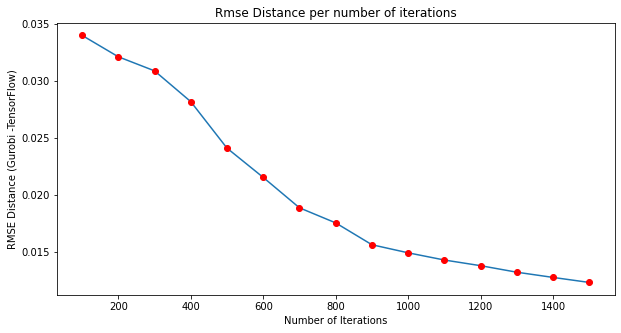

N_ITER        RMSE_DISTANCE
100           0.0339932695761943
200           0.03211723316684075
300           0.030883665470528277
400           0.028186123064350505
500           0.024111864373523712
600           0.021547509907873647
700           0.018883251915568892
800           0.01756201513980493
900           0.015648045801110233
1000          0.014940215363876984
1100          0.014309147603853834
1200          0.013812562470831758
1300          0.013241045021356746
1400          0.012784293186032176
1500          0.012344727906985818


In [16]:
path = "../../../log/Prove-5/Versicolor/c75_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

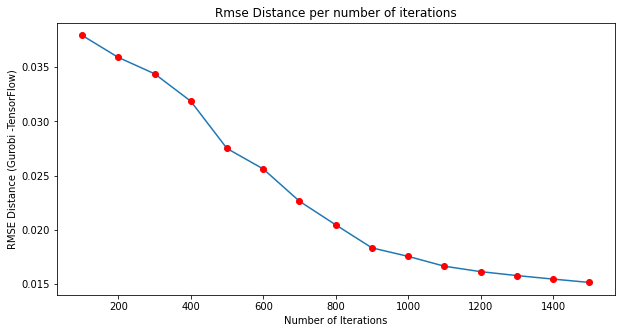

N_ITER        RMSE_DISTANCE
100           0.037916158395904814
200           0.03588382272265526
300           0.0343814587451237
400           0.031853522128113
500           0.027496609840364297
600           0.025614050705966406
700           0.022641376142873124
800           0.020465948824880918
900           0.0183450273321792
1000          0.017561915287186237
1100          0.016655593601929995
1200          0.01615590529368634
1300          0.015794023941571426
1400          0.01547095881087684
1500          0.015161123306968878


In [17]:
path = "../../../log/Prove-5/Versicolor/c75_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


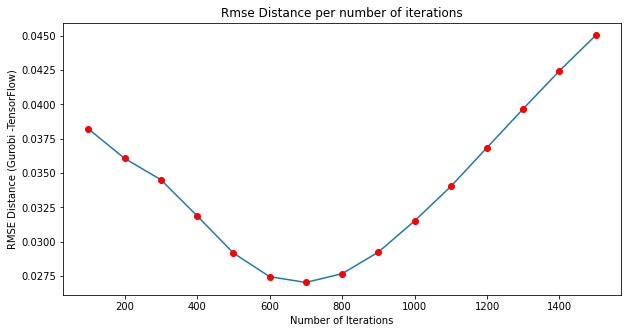

N_ITER        RMSE_DISTANCE
100           0.03821271936551509
200           0.0360662298757598
300           0.03451622686365304
400           0.031888195352126864
500           0.029180752884047045
600           0.027461542506136537
700           0.027040564591364415
800           0.027676996749983744
900           0.02924712365606534
1000          0.03151709069680938
1100          0.034025616849878176
1200          0.03685569327024088
1300          0.03968256349186945
1400          0.0424465650398408
1500          0.04502828951051532


In [18]:
path = "../../../log/Prove-5/Versicolor/c75_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

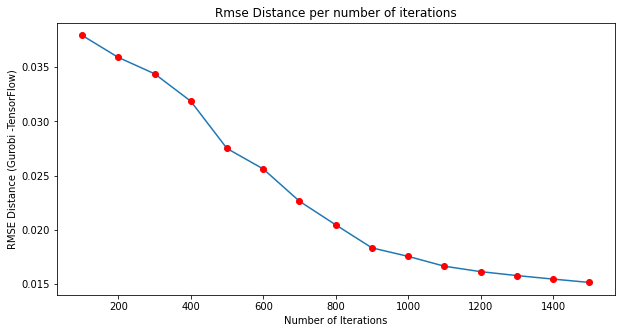

N_ITER        RMSE_DISTANCE
100           0.037916158395904814
200           0.03588382272265526
300           0.0343814587451237
400           0.031853522128113
500           0.027496609840364297
600           0.025614050705966406
700           0.022641376142873124
800           0.020465948824880918
900           0.0183450273321792
1000          0.017561915287186237
1100          0.016655593601929995
1200          0.01615590529368634
1300          0.015794023941571426
1400          0.01547095881087684
1500          0.015161123306968878


In [19]:
path = "../../../log/Prove-5/Versicolor/c75_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

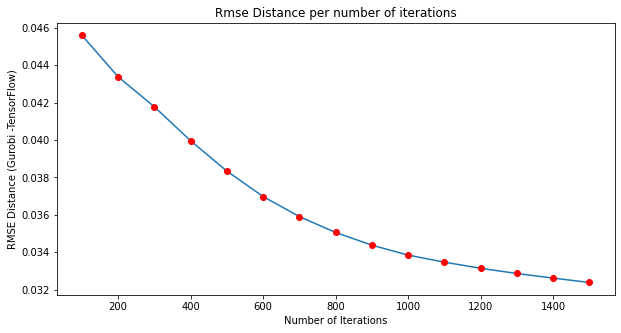

N_ITER        RMSE_DISTANCE
100           0.04558824444903367
200           0.04337057927862313
300           0.04176824549764338
400           0.039954150039866985
500           0.038335098321928086
600           0.03697566885671303
700           0.03590599777642115
800           0.035053654455843956
900           0.0343781388480002
1000          0.03384594410141871
1100          0.03346836308438291
1200          0.03314184230328894
1300          0.032862412121305695
1400          0.032618041494853735
1500          0.03238384892667157


In [20]:
path = "../../../log/Prove-5/Versicolor/c75_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


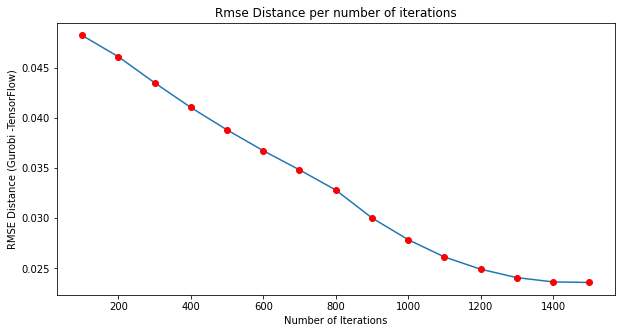

N_ITER        RMSE_DISTANCE
100           0.04823020558631476
200           0.04610359497039905
300           0.04350843048143408
400           0.04104316775867956
500           0.03880610750778675
600           0.03673232063805362
700           0.03482105052223017
800           0.03281186031109575
900           0.03003039141199699
1000          0.0278588460943972
1100          0.02613441833220274
1200          0.02491200825874498
1300          0.024074318853804916
1400          0.023647245226802248
1500          0.02359326954193118


In [21]:
path = "../../../log/Prove-5/Versicolor/c75_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

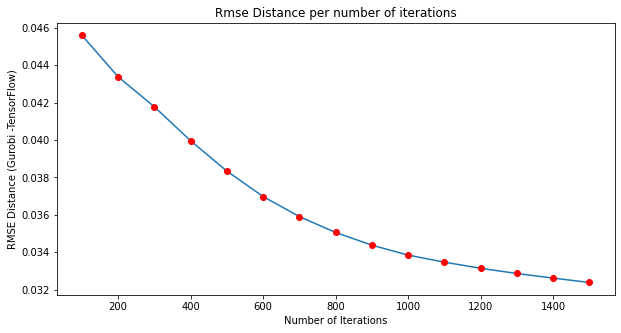

N_ITER        RMSE_DISTANCE
100           0.04558824444903367
200           0.04337057927862313
300           0.04176824549764338
400           0.039954150039866985
500           0.038335098321928086
600           0.03697566885671303
700           0.03590599777642115
800           0.035053654455843956
900           0.0343781388480002
1000          0.03384594410141871
1100          0.03346836308438291
1200          0.03314184230328894
1300          0.032862412121305695
1400          0.032618041494853735
1500          0.03238384892667157


In [22]:
path = "../../../log/Prove-5/Versicolor/c75_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

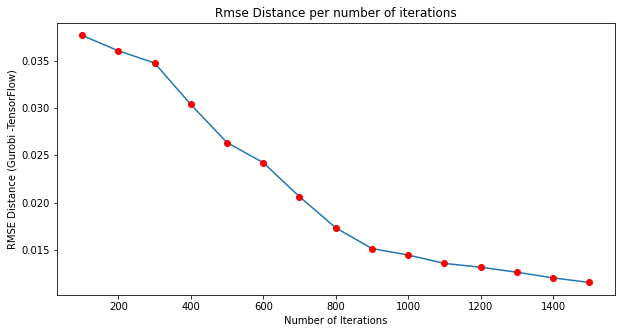

N_ITER        RMSE_DISTANCE
100           0.0376598584815421
200           0.03602980029017624
300           0.034742535760309265
400           0.03036572534704444
500           0.026334180092307
600           0.024219227249588787
700           0.02062217979179608
800           0.01733845848582187
900           0.015143962818347626
1000          0.014456421761514838
1100          0.013573288750587218
1200          0.013167296560314646
1300          0.012642818651754581
1400          0.012041994935166058
1500          0.011562354963886128


In [23]:
path = "../../../log/Prove-5/Versicolor/c200_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


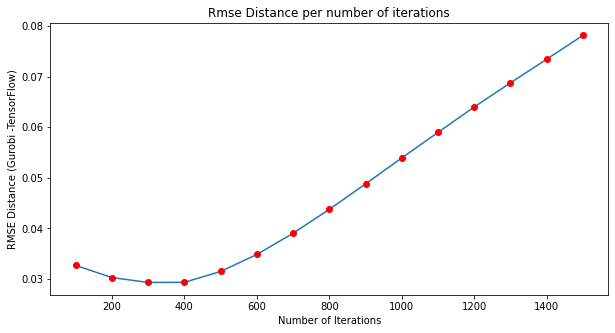

N_ITER        RMSE_DISTANCE
100           0.03265077619210964
200           0.03025340868011515
300           0.029285026753090845
400           0.029309473482977546
500           0.031456168063664074
600           0.03482443562841864
700           0.03902339840565896
800           0.04375330784366634
900           0.04879289448944227
1000          0.053927839835762756
1100          0.058990665343914825
1200          0.06402342015721611
1300          0.06880495388690544
1400          0.07347417533577287
1500          0.07819963637490895


In [24]:
path = "../../../log/Prove-5/Versicolor/c200_sigma01_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

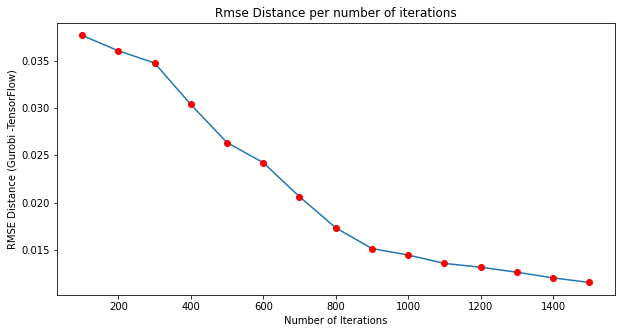

N_ITER        RMSE_DISTANCE
100           0.0376598584815421
200           0.03602980029017624
300           0.034742535760309265
400           0.03036572534704444
500           0.026334180092307
600           0.024219227249588787
700           0.02062217979179608
800           0.01733845848582187
900           0.015143962818347626
1000          0.014456421761514838
1100          0.013573288750587218
1200          0.013167296560314646
1300          0.012642818651754581
1400          0.012041994935166058
1500          0.011562354963886128


In [25]:
path = "../../../log/Prove-5/Versicolor/c200_sigma01_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

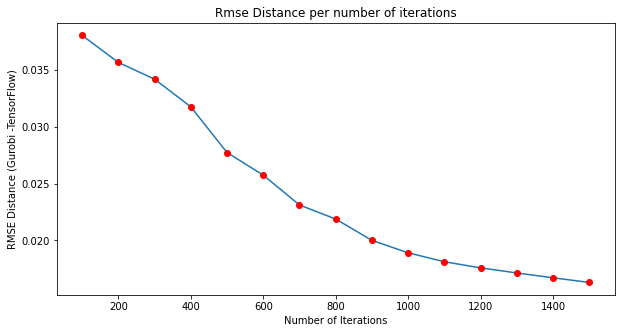

N_ITER        RMSE_DISTANCE
100           0.03806508766936255
200           0.03568196102182526
300           0.03420737840476146
400           0.03177243794767928
500           0.027742962106525725
600           0.025750336433435186
700           0.023119464787846808
800           0.02188117733544609
900           0.020002088944223156
1000          0.01890739380710641
1100          0.018118923013297334
1200          0.017580046680816575
1300          0.017131975322489622
1400          0.016704914578114953
1500          0.01629605518056428


In [26]:
path = "../../../log/Prove-5/Versicolor/c200_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


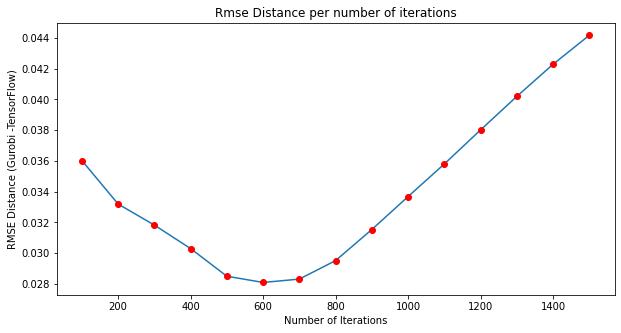

N_ITER        RMSE_DISTANCE
100           0.036015389375006916
200           0.03318839830808826
300           0.03181839590791283
400           0.030289737356376904
500           0.02849021219207896
600           0.028086693761151242
700           0.028304041307294622
800           0.029509281959041147
900           0.031530240951059114
1000          0.033672476183170354
1100          0.035794036489622476
1200          0.038009532535078897
1300          0.04019038621207133
1400          0.04228007907871806
1500          0.04416776934163406


In [27]:
path = "../../../log/Prove-5/Versicolor/c200_sigma025_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

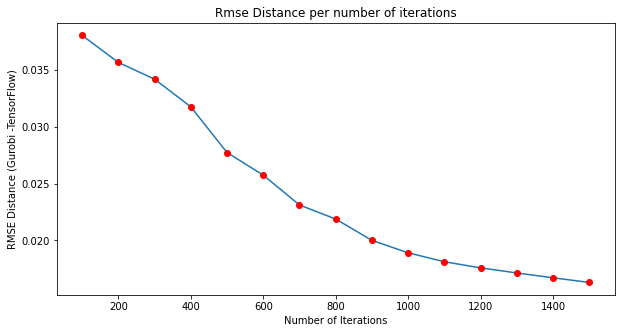

N_ITER        RMSE_DISTANCE
100           0.03806508766936255
200           0.03568196102182526
300           0.03420737840476146
400           0.03177243794767928
500           0.027742962106525725
600           0.025750336433435186
700           0.023119464787846808
800           0.02188117733544609
900           0.020002088944223156
1000          0.01890739380710641
1100          0.018118923013297334
1200          0.017580046680816575
1300          0.017131975322489622
1400          0.016704914578114953
1500          0.01629605518056428


In [28]:
path = "../../../log/Prove-5/Versicolor/c200_sigma025_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

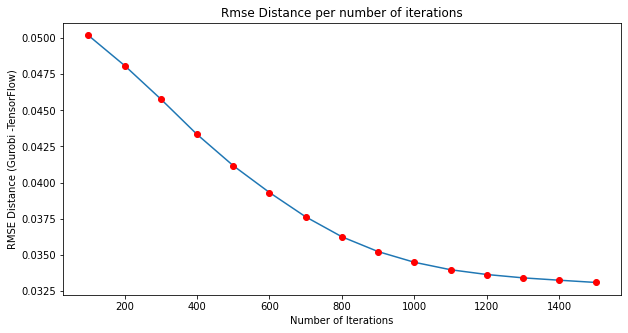

N_ITER        RMSE_DISTANCE
100           0.050198857273879266
200           0.04810923627290808
300           0.045785714539525006
400           0.043335717041769715
500           0.041167012254945526
600           0.03930653529500846
700           0.03761997087184535
800           0.03623651804692564
900           0.03521008952696956
1000          0.03446963179380796
1100          0.03395324058912307
1200          0.03362314578810038
1300          0.0333905585893469
1400          0.03322761871859123
1500          0.033073209272593725


In [29]:
path = "../../../log/Prove-5/Versicolor/c200_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)
#graph_time_per_iter(coppie_time)
#graph_rmse_distance_and_execution_time(coppie_rmse, coppie_time)


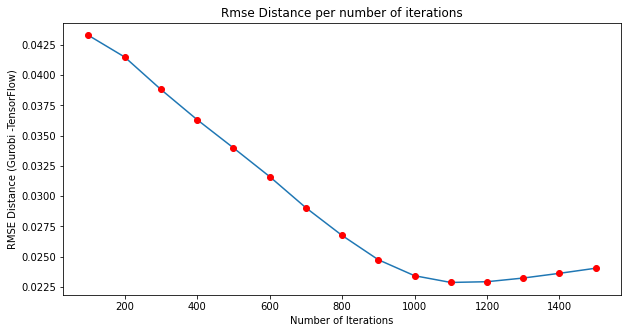

N_ITER        RMSE_DISTANCE
100           0.04328337148921041
200           0.04149249891447668
300           0.03881496340317824
400           0.036318430111228275
500           0.03399307391673416
600           0.03162163636371293
700           0.029049213290388072
800           0.0267583628980094
900           0.024751965231901967
1000          0.023432406311889892
1100          0.02287665271947547
1200          0.02293720053727152
1300          0.023240511439035594
1400          0.02363051336000115
1500          0.024051184189996876


In [30]:
path = "../../../log/Prove-5/Versicolor/c200_sigma05_penalization05_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)

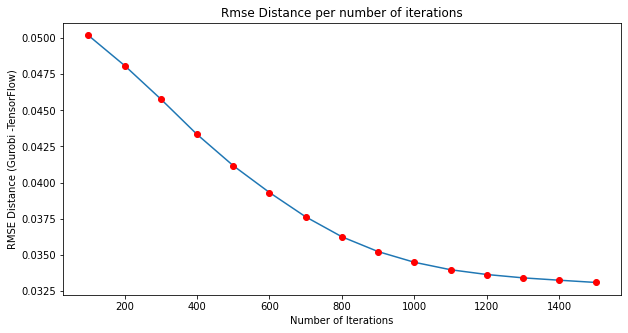

N_ITER        RMSE_DISTANCE
100           0.050198857273879266
200           0.04810923627290808
300           0.045785714539525006
400           0.043335717041769715
500           0.041167012254945526
600           0.03930653529500846
700           0.03761997087184535
800           0.03623651804692564
900           0.03521008952696956
1000          0.03446963179380796
1100          0.03395324058912307
1200          0.03362314578810038
1300          0.0333905585893469
1400          0.03322761871859123
1500          0.033073209272593725


In [31]:
path = "../../../log/Prove-5/Versicolor/c200_sigma05_penalization1_0.0001.log"

lines = start(path)
coppie_rmse = rmse_distance(lines)
coppie_time = time_per_iter(lines)

graph_rmse_distance(coppie_rmse)
tab_rmse_distance(coppie_rmse)